Try to build a classifier for the MNIST dataset that achieves over 97%
accuracy on the test set. Hint: the KNeighborsClassifier works quite well
for this task; you just need to find good hyperparameter values (try a
grid search on the weights and n_neighbors hyperparameters).


In [1]:
# Get data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

f:\Projects\machineLearningFundamental\venv\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist.data, mnist.target

In [3]:
X.shape

(70000, 784)

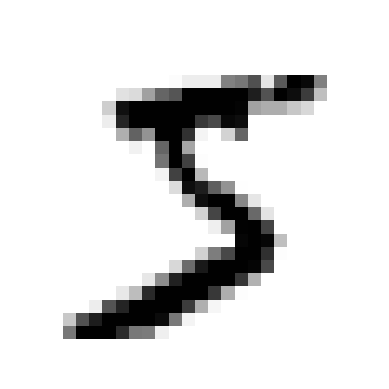

In [4]:
# Visualize data

import matplotlib.pyplot as plt
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()
    
plot_digit(X[0])

In [5]:
# split train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

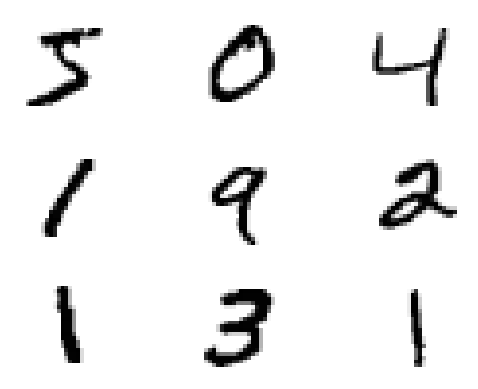

In [6]:
rows, cols = 3, 3

fig, axes = plt.subplots(rows, cols)

# Display the images
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(X[i*cols+j].reshape(28,28), cmap='binary')
        axes[i, j].axis('off')

plt.show()

In [7]:
# Train model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

In [8]:
# Test model
from sklearn.metrics import accuracy_score

print(accuracy_score(prediction, y_test))

0.9688


Our target is to get the accuracy over 97%, so we will use Grid Search on 2 parameters (weights, n_neighbors) to tune our model

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3,5,7],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [16]:
print(grid_search.best_params_)
grid_search.score(X_test, y_test)

{'n_neighbors': 3, 'weights': 'distance'}


0.9717

Exercise: Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the shift() function from the scipy.ndimage module. For example, shift(image, [2, 1], cval=0) shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation or training set expansion._

In [9]:
# shift image function
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape(28,28)
    image = shift(image, [dx, dy], cval=0)
    return image.reshape([-1])

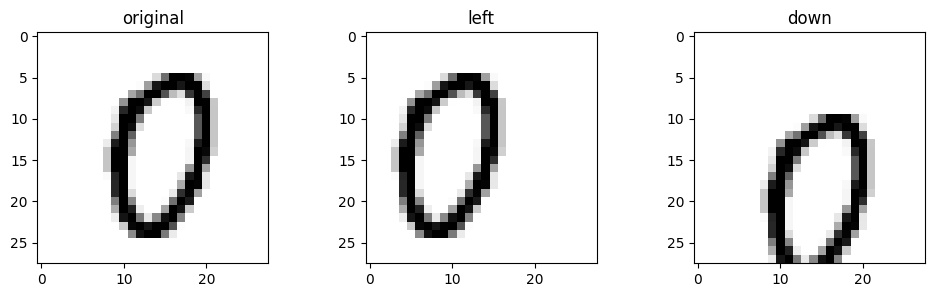

In [14]:
# test shift function
sample = X[1000]
sample_left = shift_image(sample, 0, -5)
sample_down = shift_image(sample, 5, 0)

plt.figure(figsize=(12,3))

plt.subplot(131)
plt.title('original')
plt.imshow(sample.reshape(28,28), cmap='binary')

plt.subplot(132)
plt.title('left')
plt.imshow(sample_left.reshape(28,28), cmap='binary')

plt.subplot(133)
plt.title('down')
plt.imshow(sample_down.reshape(28,28), cmap='binary')

plt.show()

In [16]:
import numpy as np

X_train_aug = [image for image in X_train]
y_train_aug = [label for label in y_train]

for (dx, dy) in [(0,2), (2,0), (0,-2), (-2,0)]:
    for image, label in zip(X_train, y_train):
        X_train_aug.append(shift_image(image, dx, dy))
        y_train_aug.append(label)

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

In [17]:
# Shuffle the augmented training set
shuffle_idx = np.random.permutation(len(X_train_aug))
X_train_aug = X_train_aug[shuffle_idx]
y_train_aug = y_train_aug[shuffle_idx]

In [18]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [19]:
knn_clf.score(X_test, y_test)

0.9706